<a href="https://colab.research.google.com/github/SrithinRaveendran/Data-Science/blob/main/cibil_score_duplicate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [94]:
a=pd.read_excel('/content/drive/MyDrive/Data/External_Cibil_Dataset.xlsx')
b=pd.read_excel('/content/drive/MyDrive/Data/Internal_Bank_Dataset.xlsx')
a

,PROSPECTID,time_since_recent_payment,time_since_first_deliquency,time_since_recent_deliquency,num_times_delinquent,max_delinquency_level,max_recent_level_of_deliq,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts,...,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,max_unsec_exposure_inPct,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2,Credit_Score,Approved_Flag
0,1,549,35,15,11,29,29,0,0,0,...,0.0,0.0,0.0,13.333,1,0,PL,PL,696,P2
1,2,47,-99999,-99999,0,-99999,0,0,0,0,...,0.0,0.0,0.0,0.860,0,0,ConsumerLoan,ConsumerLoan,685,P2
2,3,302,11,3,9,25,25,1,9,8,...,0.0,0.0,0.0,5741.667,1,0,ConsumerLoan,others,693,P2
3,4,-99999,-99999,-99999,0,-99999,0,0,0,0,...,0.0,0.0,0.0,9.900,0,0,others,others,673,P2
4,5,583,-99999,-99999,0,-99999,0,0,0,0,...,0.0,0.0,0.0,-99999.000,0,0,AL,AL,753,P1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51331,51332,15,24,23,2,24,24,0,0,0,...,0.0,0.0,0.0,1.661,0,0,ConsumerLoan,ConsumerLoan,650,P4
51332,51333,57,-99999,-99999,0,-99999,0,0,0,0,...,0.0,0.0,0.0,0.520,0,0,others,others,702,P1
51333,51334,32,-99999,-99999,0,-99999,0,0,0,0,...,0.0,1.0,0.0,0.567,0,0,ConsumerLoan,others,661,P3
51334,51335,58,-99999,-99999,0,-99999,0,0,0,0,...,0.0,0.0,0.0,1.202,0,0,ConsumerLoan,others,686,P2


In [95]:
a.head()

,PROSPECTID,time_since_recent_payment,time_since_first_deliquency,time_since_recent_deliquency,num_times_delinquent,max_delinquency_level,max_recent_level_of_deliq,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts,...,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,max_unsec_exposure_inPct,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2,Credit_Score,Approved_Flag
0,1,549,35,15,11,29,29,0,0,0,...,0.0,0.0,0.0,13.333,1,0,PL,PL,696,P2
1,2,47,-99999,-99999,0,-99999,0,0,0,0,...,0.0,0.0,0.0,0.860,0,0,ConsumerLoan,ConsumerLoan,685,P2
2,3,302,11,3,9,25,25,1,9,8,...,0.0,0.0,0.0,5741.667,1,0,ConsumerLoan,others,693,P2
3,4,-99999,-99999,-99999,0,-99999,0,0,0,0,...,0.0,0.0,0.0,9.900,0,0,others,others,673,P2
4,5,583,-99999,-99999,0,-99999,0,0,0,0,...,0.0,0.0,0.0,-99999.000,0,0,AL,AL,753,P1


In [96]:
a.tail()

,PROSPECTID,time_since_recent_payment,time_since_first_deliquency,time_since_recent_deliquency,num_times_delinquent,max_delinquency_level,max_recent_level_of_deliq,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts,...,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,max_unsec_exposure_inPct,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2,Credit_Score,Approved_Flag
51331,51332,15,24,23,2,24,24,0,0,0,...,0.0,0.0,0.0,1.661,0,0,ConsumerLoan,ConsumerLoan,650,P4
51332,51333,57,-99999,-99999,0,-99999,0,0,0,0,...,0.0,0.0,0.0,0.520,0,0,others,others,702,P1
51333,51334,32,-99999,-99999,0,-99999,0,0,0,0,...,0.0,1.0,0.0,0.567,0,0,ConsumerLoan,others,661,P3
51334,51335,58,-99999,-99999,0,-99999,0,0,0,0,...,0.0,0.0,0.0,1.202,0,0,ConsumerLoan,others,686,P2
51335,51336,74,-99999,-99999,0,-99999,0,0,0,0,...,0.0,0.0,0.0,-99999.000,0,0,others,others,681,P2


In [97]:
a.isna().sum()

PROSPECTID                      0
time_since_recent_payment       0
time_since_first_deliquency     0
time_since_recent_deliquency    0
num_times_delinquent            0
                               ..
GL_Flag                         0
last_prod_enq2                  0
first_prod_enq2                 0
Credit_Score                    0
Approved_Flag                   0
Length: 62, dtype: int64

In [98]:
b

,PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,...,CC_TL,Consumer_TL,Gold_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL
0,1,5,4,1,0,0,0.000,0.00,0.200,0.800,...,0,0,1,0,4,1,4,0,72,18
1,2,1,0,1,0,0,0.000,0.00,1.000,0.000,...,0,1,0,0,0,0,1,0,7,7
2,3,8,0,8,1,0,0.125,0.00,1.000,0.000,...,0,6,1,0,0,2,6,0,47,2
3,4,1,0,1,1,0,1.000,0.00,1.000,0.000,...,0,0,0,0,0,0,1,1,5,5
4,5,3,2,1,0,0,0.000,0.00,0.333,0.667,...,0,0,0,0,0,3,0,2,131,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51331,51332,3,0,3,1,0,0.333,0.00,1.000,0.000,...,0,2,0,0,0,0,3,1,24,5
51332,51333,4,2,2,0,1,0.000,0.25,0.500,0.500,...,0,2,0,0,0,2,2,0,74,7
51333,51334,2,1,1,1,1,0.500,0.50,0.500,0.500,...,0,2,0,0,0,0,2,0,9,5
51334,51335,2,1,1,0,0,0.000,0.00,0.500,0.500,...,0,2,0,0,0,0,2,0,15,8


In [99]:
b.head()

,PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,...,CC_TL,Consumer_TL,Gold_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL
0,1,5,4,1,0,0,0.000,0.0,0.200,0.800,...,0,0,1,0,4,1,4,0,72,18
1,2,1,0,1,0,0,0.000,0.0,1.000,0.000,...,0,1,0,0,0,0,1,0,7,7
2,3,8,0,8,1,0,0.125,0.0,1.000,0.000,...,0,6,1,0,0,2,6,0,47,2
3,4,1,0,1,1,0,1.000,0.0,1.000,0.000,...,0,0,0,0,0,0,1,1,5,5
4,5,3,2,1,0,0,0.000,0.0,0.333,0.667,...,0,0,0,0,0,3,0,2,131,32


In [100]:
b.tail()

,PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,...,CC_TL,Consumer_TL,Gold_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL
51331,51332,3,0,3,1,0,0.333,0.00,1.0,0.0,...,0,2,0,0,0,0,3,1,24,5
51332,51333,4,2,2,0,1,0.000,0.25,0.5,0.5,...,0,2,0,0,0,2,2,0,74,7
51333,51334,2,1,1,1,1,0.500,0.50,0.5,0.5,...,0,2,0,0,0,0,2,0,9,5
51334,51335,2,1,1,0,0,0.000,0.00,0.5,0.5,...,0,2,0,0,0,0,2,0,15,8
51335,51336,1,0,1,0,0,0.000,0.00,1.0,0.0,...,0,0,0,0,0,1,0,0,20,20


In [101]:
b.isna().sum()

PROSPECTID              0
Total_TL                0
Tot_Closed_TL           0
Tot_Active_TL           0
Total_TL_opened_L6M     0
Tot_TL_closed_L6M       0
pct_tl_open_L6M         0
pct_tl_closed_L6M       0
pct_active_tl           0
pct_closed_tl           0
Total_TL_opened_L12M    0
Tot_TL_closed_L12M      0
pct_tl_open_L12M        0
pct_tl_closed_L12M      0
Tot_Missed_Pmnt         0
Auto_TL                 0
CC_TL                   0
Consumer_TL             0
Gold_TL                 0
Home_TL                 0
PL_TL                   0
Secured_TL              0
Unsecured_TL            0
Other_TL                0
Age_Oldest_TL           0
Age_Newest_TL           0
dtype: int64

In [102]:
a.columns

Index(['PROSPECTID', 'time_since_recent_payment',
       'time_since_first_deliquency', 'time_since_recent_deliquency',
       'num_times_delinquent', 'max_delinquency_level',
       'max_recent_level_of_deliq', 'num_deliq_6mts', 'num_deliq_12mts',
       'num_deliq_6_12mts', 'max_deliq_6mts', 'max_deliq_12mts',
       'num_times_30p_dpd', 'num_times_60p_dpd', 'num_std', 'num_std_6mts',
       'num_std_12mts', 'num_sub', 'num_sub_6mts', 'num_sub_12mts', 'num_dbt',
       'num_dbt_6mts', 'num_dbt_12mts', 'num_lss', 'num_lss_6mts',
       'num_lss_12mts', 'recent_level_of_deliq', 'tot_enq', 'CC_enq',
       'CC_enq_L6m', 'CC_enq_L12m', 'PL_enq', 'PL_enq_L6m', 'PL_enq_L12m',
       'time_since_recent_enq', 'enq_L12m', 'enq_L6m', 'enq_L3m',
       'MARITALSTATUS', 'EDUCATION', 'AGE', 'GENDER', 'NETMONTHLYINCOME',
       'Time_With_Curr_Empr', 'pct_of_active_TLs_ever',
       'pct_opened_TLs_L6m_of_L12m', 'pct_currentBal_all_TL', 'CC_utilization',
       'CC_Flag', 'PL_utilization', 'PL_Fla

In [103]:
b.columns

Index(['PROSPECTID', 'Total_TL', 'Tot_Closed_TL', 'Tot_Active_TL',
       'Total_TL_opened_L6M', 'Tot_TL_closed_L6M', 'pct_tl_open_L6M',
       'pct_tl_closed_L6M', 'pct_active_tl', 'pct_closed_tl',
       'Total_TL_opened_L12M', 'Tot_TL_closed_L12M', 'pct_tl_open_L12M',
       'pct_tl_closed_L12M', 'Tot_Missed_Pmnt', 'Auto_TL', 'CC_TL',
       'Consumer_TL', 'Gold_TL', 'Home_TL', 'PL_TL', 'Secured_TL',
       'Unsecured_TL', 'Other_TL', 'Age_Oldest_TL', 'Age_Newest_TL'],
      dtype='object')

<Axes: >

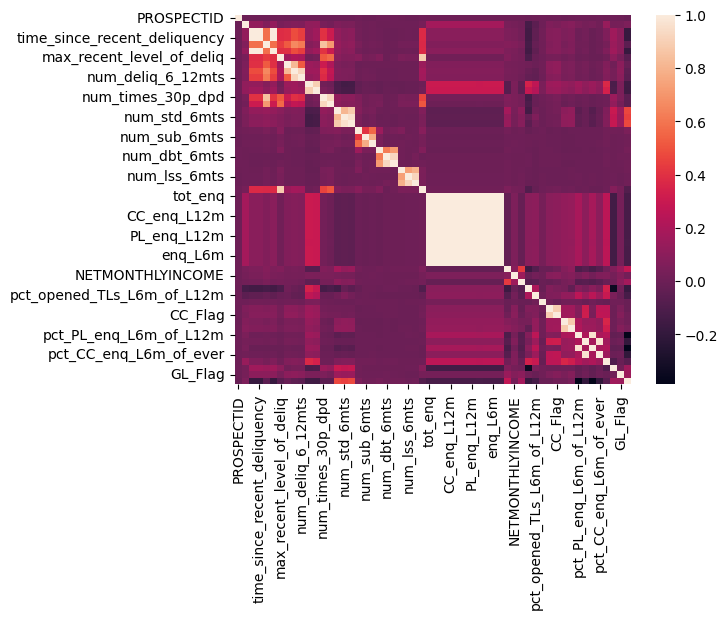

In [104]:
sns.heatmap(a.corr(numeric_only=True))

<Axes: >

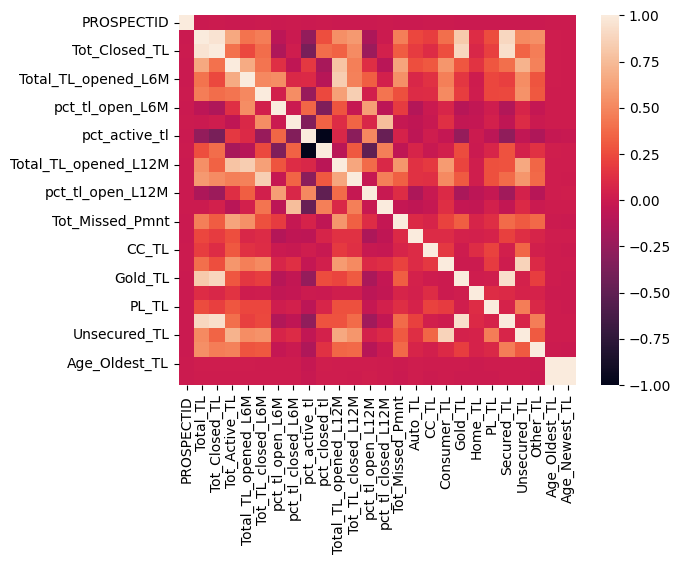

In [105]:
sns.heatmap(b.corr(numeric_only=True))

In [106]:
df = pd. merge ( a, b, how ='inner', left_on = ['PROSPECTID'], right_on = ['PROSPECTID'] )
df

,PROSPECTID,time_since_recent_payment,time_since_first_deliquency,time_since_recent_deliquency,num_times_delinquent,max_delinquency_level,max_recent_level_of_deliq,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts,...,CC_TL,Consumer_TL,Gold_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL
0,1,549,35,15,11,29,29,0,0,0,...,0,0,1,0,4,1,4,0,72,18
1,2,47,-99999,-99999,0,-99999,0,0,0,0,...,0,1,0,0,0,0,1,0,7,7
2,3,302,11,3,9,25,25,1,9,8,...,0,6,1,0,0,2,6,0,47,2
3,4,-99999,-99999,-99999,0,-99999,0,0,0,0,...,0,0,0,0,0,0,1,1,5,5
4,5,583,-99999,-99999,0,-99999,0,0,0,0,...,0,0,0,0,0,3,0,2,131,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51331,51332,15,24,23,2,24,24,0,0,0,...,0,2,0,0,0,0,3,1,24,5
51332,51333,57,-99999,-99999,0,-99999,0,0,0,0,...,0,2,0,0,0,2,2,0,74,7
51333,51334,32,-99999,-99999,0,-99999,0,0,0,0,...,0,2,0,0,0,0,2,0,9,5
51334,51335,58,-99999,-99999,0,-99999,0,0,0,0,...,0,2,0,0,0,0,2,0,15,8


<Axes: >

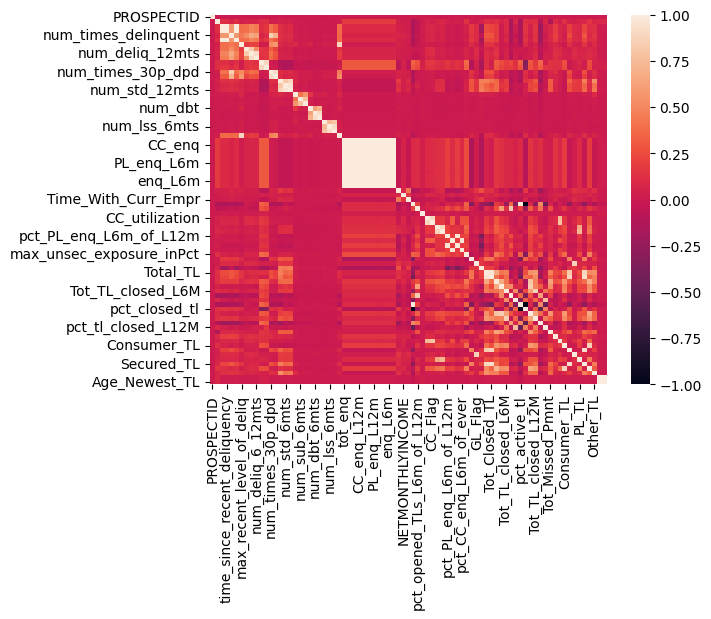

In [107]:
sns.heatmap(df.corr(numeric_only=True))

In [108]:
r=(df== -99999).sum().sort_values(ascending=False).head(40)
r

CC_utilization                  47636
PL_utilization                  44435
time_since_first_deliquency     35949
time_since_recent_deliquency    35949
max_delinquency_level           35949
max_unsec_exposure_inPct        23178
max_deliq_6mts                  12890
max_deliq_12mts                 10832
enq_L3m                          6321
tot_enq                          6321
enq_L6m                          6321
enq_L12m                         6321
time_since_recent_enq            6321
PL_enq_L12m                      6321
PL_enq_L6m                       6321
PL_enq                           6321
CC_enq_L12m                      6321
CC_enq_L6m                       6321
CC_enq                           6321
time_since_recent_payment        4291
pct_currentBal_all_TL              72
Age_Newest_TL                      40
Age_Oldest_TL                      40
pct_closed_tl                       0
Total_TL_opened_L6M                 0
HL_Flag                             0
GL_Flag     

In [109]:
df.drop(['time_since_first_deliquency', 'time_since_recent_deliquency'
, 'max_delinquency_level', 'max_deliq_6mts', 'max_deliq_12mts', 'CC_utilization', 'PL_utilization', 'max_unsec_exposure_inPct','PROSPECTID'],axis=1,inplace=True)

In [110]:
d=(df== -99999).sum().sort_values(ascending=False).head(40)
d

tot_enq                      6321
enq_L3m                      6321
enq_L6m                      6321
enq_L12m                     6321
time_since_recent_enq        6321
PL_enq_L12m                  6321
PL_enq_L6m                   6321
PL_enq                       6321
CC_enq_L12m                  6321
CC_enq_L6m                   6321
CC_enq                       6321
time_since_recent_payment    4291
pct_currentBal_all_TL          72
Age_Oldest_TL                  40
Age_Newest_TL                  40
num_dbt_6mts                    0
Total_TL_opened_L12M            0
last_prod_enq2                  0
first_prod_enq2                 0
Credit_Score                    0
Approved_Flag                   0
Total_TL                        0
Tot_Closed_TL                   0
Tot_Active_TL                   0
Total_TL_opened_L6M             0
Tot_TL_closed_L6M               0
pct_tl_open_L6M                 0
pct_tl_closed_L6M               0
pct_active_tl                   0
pct_closed_tl 

In [111]:
df['time_since_recent_payment']=df['time_since_recent_payment'].replace(-99999,df['time_since_recent_payment'].mean())
df['tot_enq']=df['tot_enq'].replace(-99999,df['tot_enq'].mode()[0])
df['CC_enq']=df['CC_enq'].replace(-99999,df['CC_enq'].mode()[0])
df['CC_enq_L6m']=df['CC_enq_L6m'].replace(-99999,df['CC_enq_L6m'].mode()[0])
df['CC_enq_L12m']=df['CC_enq_L12m'].replace(-99999,df['CC_enq_L12m'].mode()[0])
df['PL_enq_L12m']=df['PL_enq_L12m'].replace(-99999,df['PL_enq_L12m'].mode()[0])
df['PL_enq_L6m']=df['PL_enq_L6m'].replace(-99999,df['PL_enq_L6m'].mode()[0])
df['PL_enq']=df['PL_enq'].replace(-99999,df['PL_enq'].mode()[0])
df['enq_L12m']=df['enq_L12m'].replace(-99999,df['enq_L12m'] .mode()[0])
df['enq_L6m']=df['enq_L6m'].replace(-99999,df['enq_L6m'].mode()[0])
df['enq_L3m']=df['enq_L3m'].replace(-99999,df['enq_L3m'].mode()[0])
df['pct_currentBal_all_TL']=df['pct_currentBal_all_TL'].replace(-99999,df['pct_currentBal_all_TL'].mean())
df['Age_Newest_TL']=df['Age_Newest_TL'].replace(-99999,df['Age_Newest_TL'].mode()[0])
df['Age_Oldest_TL']=df['Age_Oldest_TL'].replace(-99999,df['Age_Oldest_TL'].mode()[0])

Text(0.5, 1.0, 'MARITALSTATUS GRAPH')

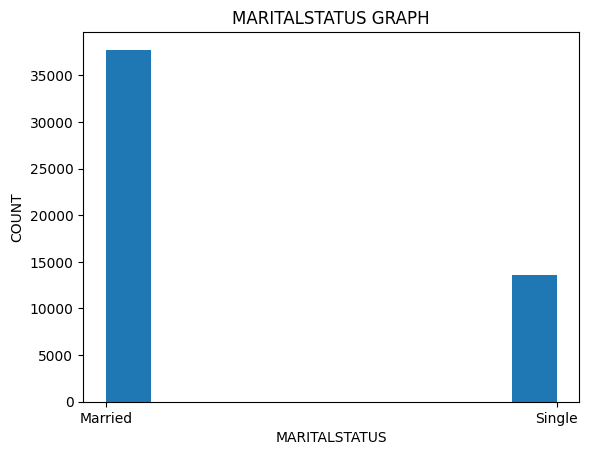

In [112]:
plt.hist(df['MARITALSTATUS'])
plt.xlabel('MARITALSTATUS')
plt.ylabel('COUNT')
plt.title('MARITALSTATUS GRAPH')

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, '12TH'),
  Text(1, 0, 'GRADUATE'),
  Text(2, 0, 'SSC'),
  Text(3, 0, 'POST-GRADUATE'),
  Text(4, 0, 'UNDER GRADUATE'),
  Text(5, 0, 'OTHERS'),
  Text(6, 0, 'PROFESSIONAL')])

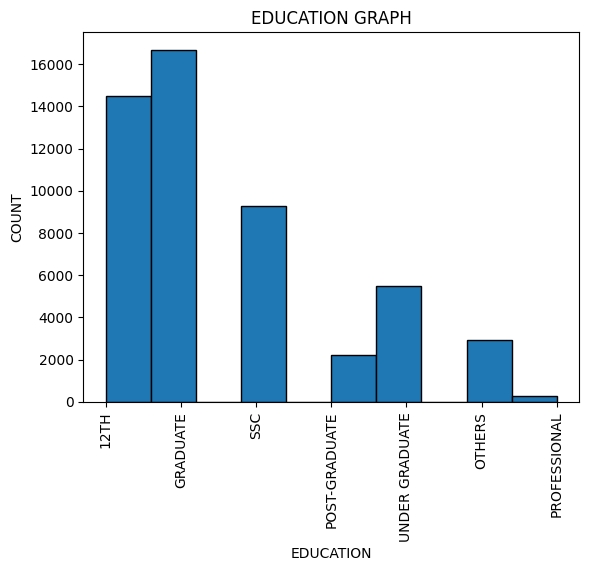

In [113]:
plt.hist(df['EDUCATION'],edgecolor='black')
plt.xlabel('EDUCATION')
plt.ylabel('COUNT')
plt.title('EDUCATION GRAPH')
plt.xticks(rotation=90)

Text(0.5, 1.0, 'GENDER GRAPH')

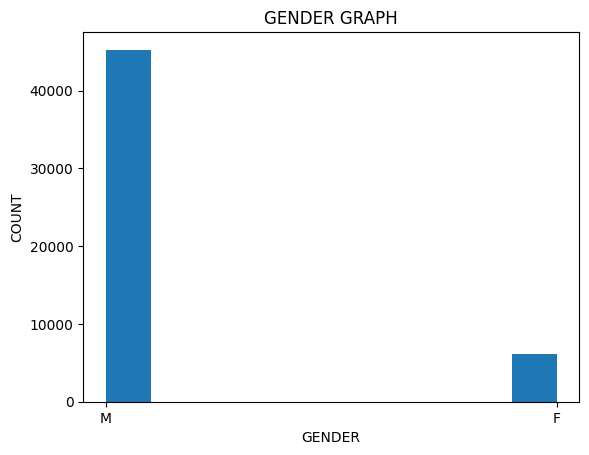

In [114]:
plt.hist(df['GENDER'])
plt.xlabel('GENDER')
plt.ylabel('COUNT')
plt.title('GENDER GRAPH')

Text(0.5, 1.0, 'AGE GRAPH')

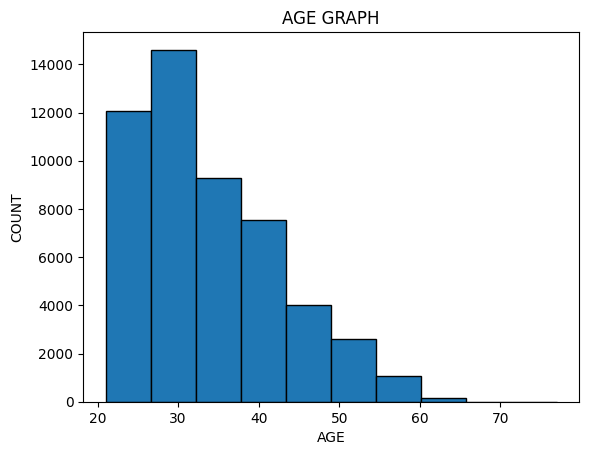

In [115]:
plt.hist(df['AGE'],edgecolor="black")
plt.xlabel('AGE')
plt.ylabel('COUNT')
plt.title('AGE GRAPH')

In [116]:
to_encode=[]
for i in df.columns:
    if df[i].dtype == 'object':
        to_encode.append(i)
to_encode

['MARITALSTATUS',
 'EDUCATION',
 'GENDER',
 'last_prod_enq2',
 'first_prod_enq2',
 'Approved_Flag']

In [117]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
for i in to_encode:
    df[i]=lb.fit_transform(df[i])

([<matplotlib.axis.XTick at 0x7f760edc2170>,
 [Text(0, 0, '0'), Text(1, 0, '1')])

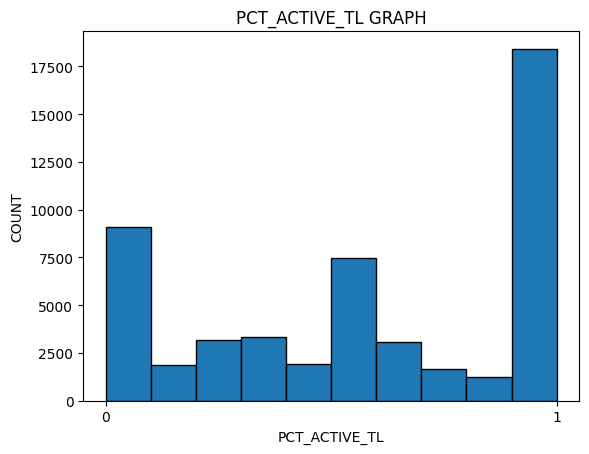

In [118]:
# x=df['pct_active_tl'].value_counts()
# y=df['pct_active_tl'].unique()
plt.hist(df['pct_active_tl'],edgecolor='black')
plt.xlabel('PCT_ACTIVE_TL')
plt.ylabel('COUNT')
plt.title('PCT_ACTIVE_TL GRAPH')
plt.xticks(range(0,2,))

Text(0, 0.5, 'COUNT')

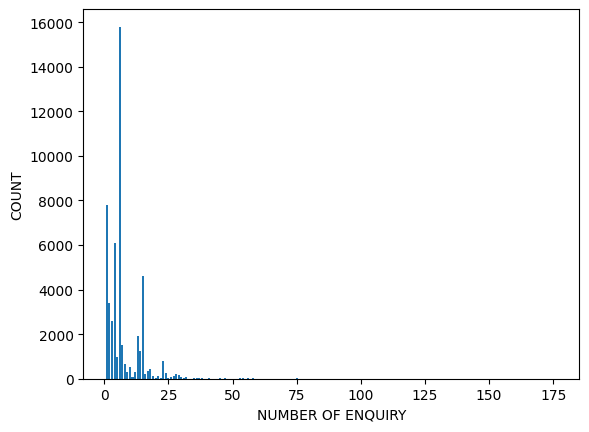

In [119]:
x=df['tot_enq'].unique()
y=df['tot_enq'].value_counts()
#plt.xticks(range(0,200,25))
plt.bar(x,y)
plt.xlabel('NUMBER OF ENQUIRY')
plt.ylabel('COUNT')

<BarContainer object of 18 artists>

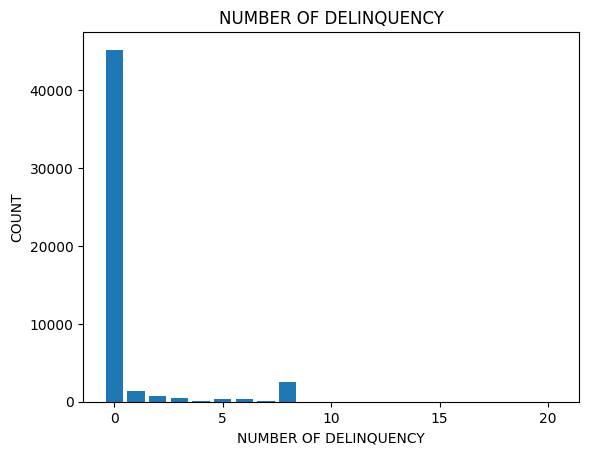

In [120]:
x=df['num_deliq_6_12mts'].unique()
y=df['num_deliq_6_12mts'].value_counts()
plt.title('NUMBER OF DELINQUENCY')
plt.xlabel('NUMBER OF DELINQUENCY')
plt.ylabel('COUNT')
plt.xticks(range(0,25,5))
plt.bar(x,y)

In [121]:
y=df['Credit_Score']
x=df.drop(['Credit_Score'],axis=1)
y

0        696
1        685
2        693
3        673
4        753
        ... 
51331    650
51332    702
51333    661
51334    686
51335    681
Name: Credit_Score, Length: 51336, dtype: int64

In [122]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
x_train

,time_since_recent_payment,num_times_delinquent,max_recent_level_of_deliq,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts,num_times_30p_dpd,num_times_60p_dpd,num_std,num_std_6mts,...,CC_TL,Consumer_TL,Gold_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL
18524,1002.000000,5,31,1,1,0,1,0,50,7,...,0,0,7,0,0,11,1,4,48,13
40162,-8129.961314,0,0,0,0,0,0,0,0,0,...,0,0,3,0,0,3,0,0,91,82
23519,64.000000,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,7,7
4206,1567.000000,0,0,0,0,0,0,0,29,0,...,0,0,2,0,0,7,0,5,66,4
32061,1531.000000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,60,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21243,38.000000,9,90,0,0,0,7,5,17,3,...,1,0,0,2,0,5,2,3,76,5
45891,417.000000,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,2,1,17,17
42613,47.000000,1,5,1,1,0,0,0,0,0,...,0,0,4,0,0,5,0,0,58,10
43567,473.000000,0,0,0,0,0,0,0,6,4,...,0,0,0,0,1,1,1,0,40,7


In [123]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
importances = rf.feature_importances_
feature_names = df.columns[:-1]  # Excluding the target column
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances.sort_values(by='Importance', ascending=False, inplace=True,ignore_index=True)
print(feature_importances)

                  Feature    Importance
0            Credit_Score  7.388377e-01
1                 enq_L3m  6.857517e-02
2                Other_TL  4.351130e-02
3           num_std_12mts  3.071119e-02
4   time_since_recent_enq  1.130704e-02
..                    ...           ...
72          num_dbt_12mts  6.126902e-06
73           num_sub_6mts  2.465484e-06
74          num_lss_12mts  1.465587e-06
75           num_dbt_6mts  8.061158e-07
76           num_lss_6mts  1.655357e-07

[77 rows x 2 columns]


In [124]:
feature_importances.head(40)

,Feature,Importance
0,Credit_Score,0.738838
1,enq_L3m,0.068575
2,Other_TL,0.043511
3,num_std_12mts,0.030711
4,time_since_recent_enq,0.011307
5,max_recent_level_of_deliq,0.009416
6,recent_level_of_deliq,0.008386
7,Age_Oldest_TL,0.005904
8,num_std,0.005724
9,time_since_recent_payment,0.005686


In [125]:
imp=feature_importances.loc[feature_importances['Importance']>0.004]
imp

,Feature,Importance
0,Credit_Score,0.738838
1,enq_L3m,0.068575
2,Other_TL,0.043511
3,num_std_12mts,0.030711
4,time_since_recent_enq,0.011307
5,max_recent_level_of_deliq,0.009416
6,recent_level_of_deliq,0.008386
7,Age_Oldest_TL,0.005904
8,num_std,0.005724
9,time_since_recent_payment,0.005686


In [126]:
lst=list(imp['Feature'])
lst

['Credit_Score',
 'enq_L3m',
 'Other_TL',
 'num_std_12mts',
 'time_since_recent_enq',
 'max_recent_level_of_deliq',
 'recent_level_of_deliq',
 'Age_Oldest_TL',
 'num_std',
 'time_since_recent_payment',
 'Time_With_Curr_Empr',
 'NETMONTHLYINCOME',
 'AGE',
 'num_times_delinquent',
 'pct_currentBal_all_TL']

In [127]:
df1=df[lst]
df1

,Credit_Score,enq_L3m,Other_TL,num_std_12mts,time_since_recent_enq,max_recent_level_of_deliq,recent_level_of_deliq,Age_Oldest_TL,num_std,time_since_recent_payment,Time_With_Curr_Empr,NETMONTHLYINCOME,AGE,num_times_delinquent,pct_currentBal_all_TL
0,696,0,0,11,566,29,29,72,21,549.000000,114,51000,48,11,0.798
1,685,0,0,0,209,0,0,7,0,47.000000,50,19000,23,0,0.370
2,693,0,0,10,587,25,25,47,10,302.000000,191,18,40,9,0.585
3,673,0,1,5,-99999,0,0,5,5,-8129.961314,246,10000,34,0,0.990
4,753,0,2,16,3951,0,0,131,53,583.000000,75,15000,48,0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51331,650,1,1,0,0,24,24,24,0,15.000000,249,18500,43,2,0.230
51332,702,0,0,6,203,0,0,74,6,57.000000,186,25000,31,0,0.660
51333,661,2,0,0,1,0,0,9,0,32.000000,66,18000,28,0,0.428
51334,686,0,0,0,242,0,0,15,0,58.000000,54,12802,25,0,0.143


In [128]:
y1=df1['Credit_Score']
x1=df1.drop(['Credit_Score'],axis=1)

In [129]:
for i in lst:

    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df=df[(df[i]>lower_bound)&(df[i]<upper_bound)]

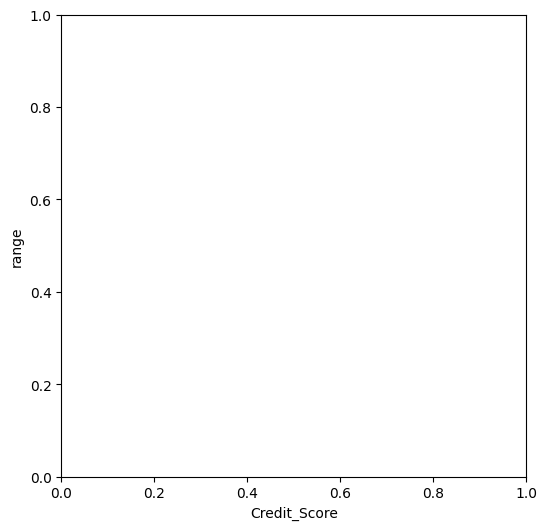

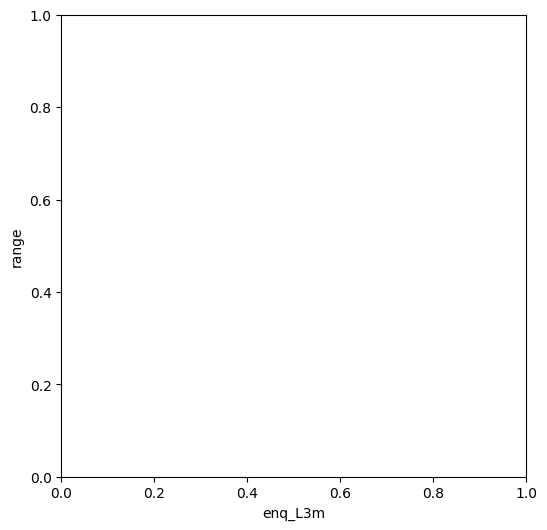

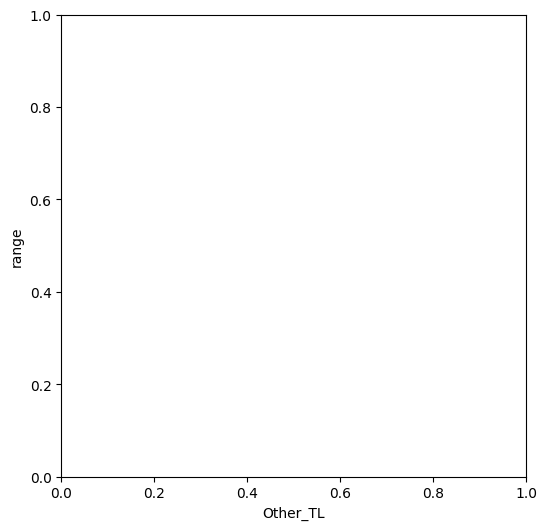

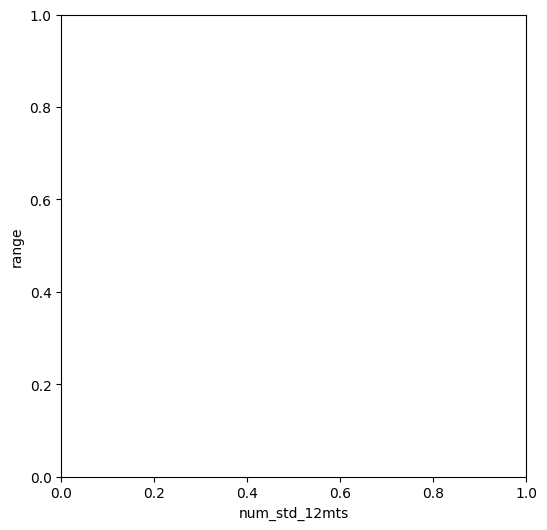

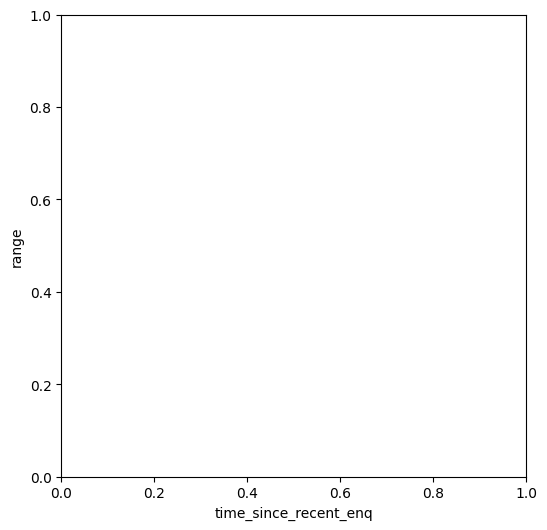

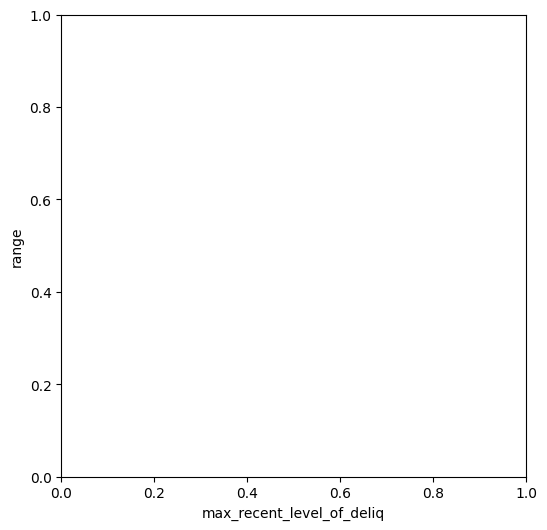

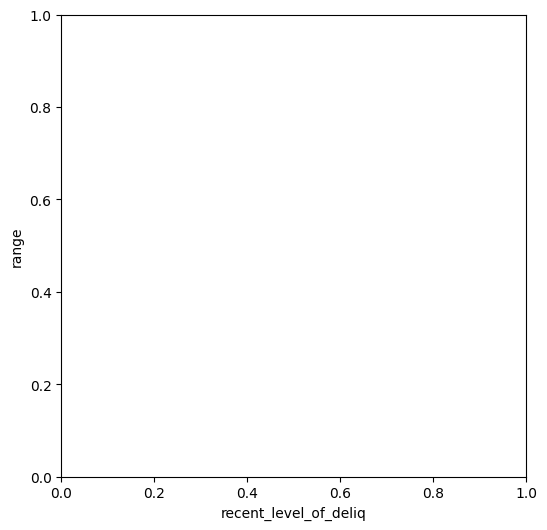

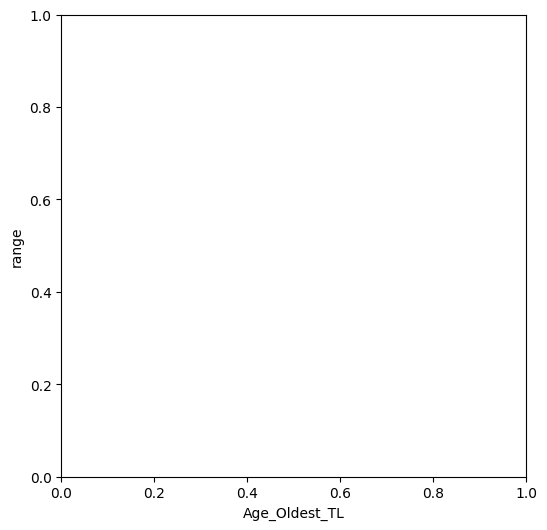

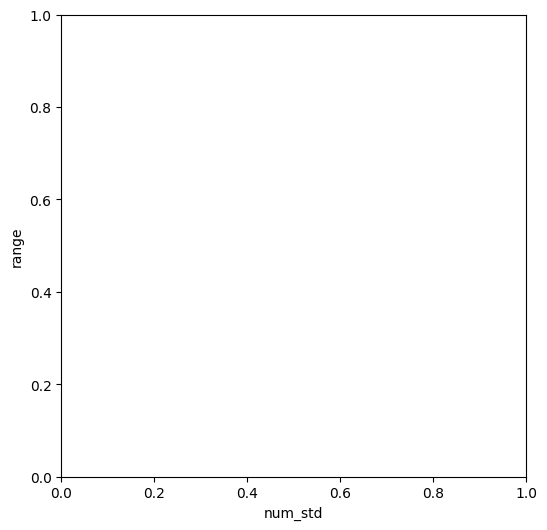

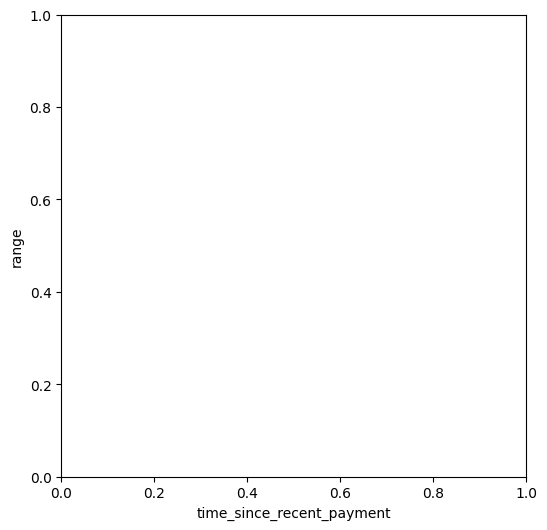

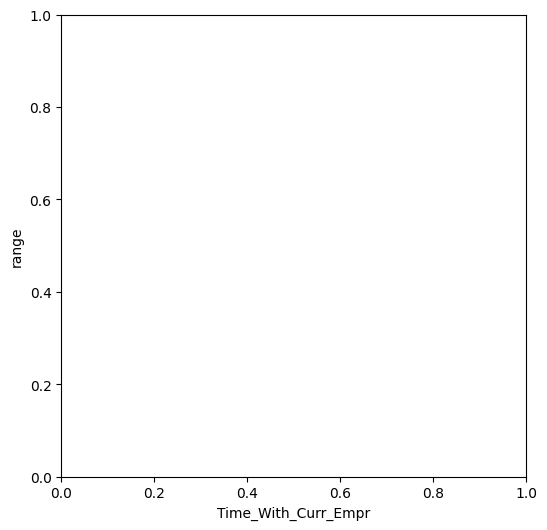

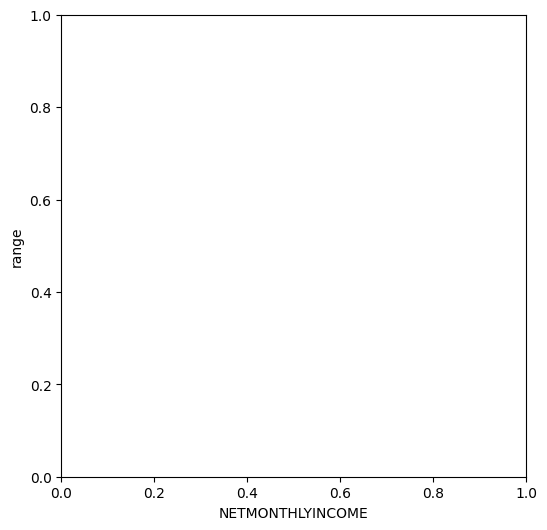

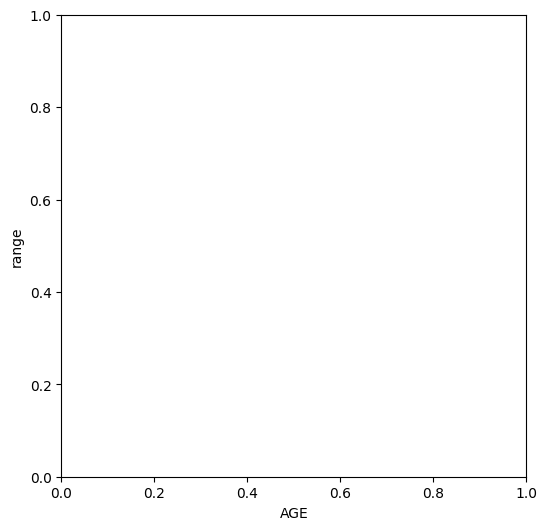

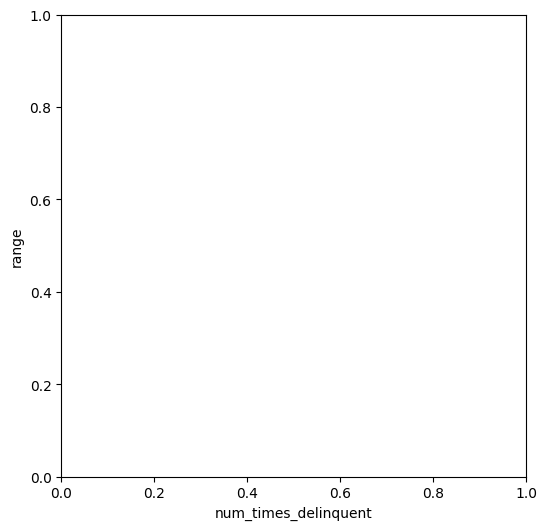

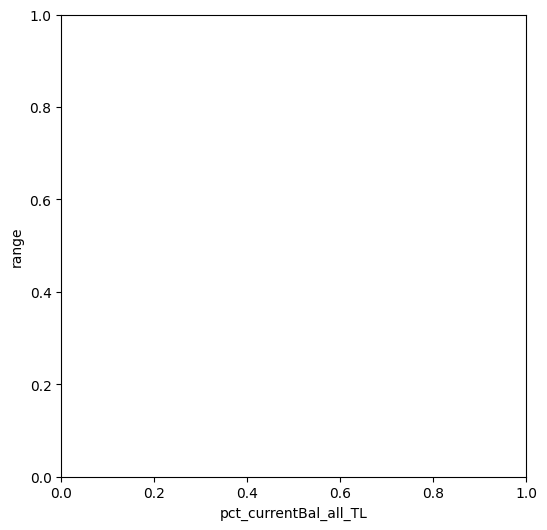

In [130]:
for i in lst:

  plt.figure(figsize=(6,6))
  plt.xlabel(i)
  plt.ylabel('range')
  sns.boxplot(df[i],color='blue')
  plt.show

In [131]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=42)

In [132]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

<Axes: xlabel='Credit_Score'>

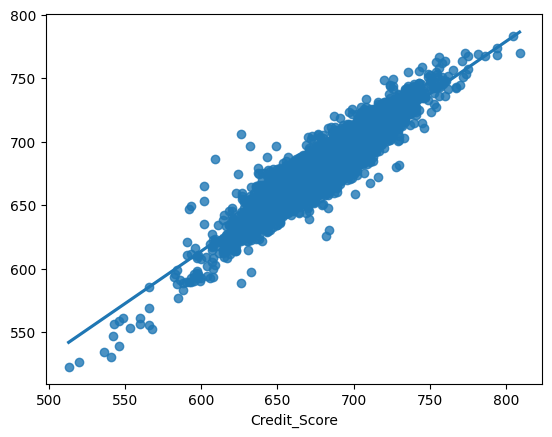

In [133]:
sns.regplot(x=y_test,y=y_pred)

In [134]:
pd.DataFrame({'actual':y_test,'predicted':y_pred,'dfference':y_pred-y_test})

,actual,predicted,dfference
8564,654,644.86,-9.14
26313,671,679.64,8.64
12212,683,689.55,6.55
37578,697,686.65,-10.35
21647,675,684.75,9.75
...,...,...,...
11131,692,683.02,-8.98
32508,654,663.35,9.35
4880,692,687.89,-4.11
17686,660,654.76,-5.24


In [135]:
from sklearn.metrics import r2_score,mean_absolute_percentage_error
print(r2_score(y_test,y_pred))
print(mean_absolute_percentage_error(y_test,y_pred))

0.8321055607956441
0.00976025489830126


In [136]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
model1=RandomForestRegressor(random_state=42)


In [137]:
param_dist = {
    'n_estimators': randint(100, 500),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None] + list(range(10, 51, 10)),
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5),
    'bootstrap': [True, False]
}


In [138]:
random_search = RandomizedSearchCV(estimator=model1,param_distributions=param_dist,n_iter=10,cv=5,random_state=42,n_jobs=-1,verbose=2)


In [139]:
random_search.fit(x_train, y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30, 40, 50],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f75f997f8e0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f75f997fa30>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f75f997fa60>},
                   random_state=42, verbose=2)

In [140]:
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)


Best Parameters: {'bootstrap': True, 'max_depth': 30, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 6, 'n_estimators': 406}
Best Score: 0.8302496054291508


In [141]:
model4 = RandomForestRegressor(
    bootstrap=True,
    max_depth=40,
    max_features='auto',
    min_samples_leaf=3,
    min_samples_split=3,
    n_estimators=487)
model4.fit(x_train, y_train)
y_pred_Random1=model4.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


In [142]:
pd.DataFrame({'actual':y_test,'predicted':y_pred_Random1,'dfference':y_pred_Random1-y_pred})

,actual,predicted,dfference
8564,654,645.947504,1.087504
26313,671,679.924245,0.284245
12212,683,689.130127,-0.419873
37578,697,687.105756,0.455756
21647,675,684.396122,-0.353878
...,...,...,...
11131,692,683.167962,0.147962
32508,654,662.877185,-0.472815
4880,692,688.107978,0.217978
17686,660,656.215170,1.455170


In [143]:
print(r2_score(y_test,y_pred_Random1))
print(mean_absolute_percentage_error(y_test,y_pred_Random1))

0.8347383730506467
0.009703571443347062


In [144]:
import pickle

In [145]:
with open('cibil_Score.pkl','wb') as file:
  pickle.dump(model4,file)

In [146]:
from joblib import dump

# Assuming 'model' is your RandomForestRegressor model
dump(model4, 'cibil_Score.joblib')

['cibil_Score.joblib']